## Analyze Inherent structures

This notebook is to get a grasp on analyzing the inherent structure trajectories.


### Import modules

In [1]:
# data analysis and wrangling
import numpy as np 
import pandas as pd
import random as rnd
from scipy import stats

#visualization
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.graphics.mosaicplot import mosaic


### Load data

In [2]:
fnameRidges='/home/marco/STRUCTURAL-GLASS/OUTPUT/T0.49/N65/S1/elistRidge.txt'
dataRidges=pd.read_csv(fnameRidges ,sep=' ')
nRidges=len(dataRidges)

### A first look at the data

In [3]:
#This is what the data looks like
print('Keys: ',dataRidges.columns.values)
dataRidges.head(5)
#dataRidges.describe()

Keys:  ['time' 'Eridge' 'Eante' 'Epost']


,time,Eridge,Eante,Epost
0,20.5,-401.252593,-401.398684,-401.856656
1,30.5,-401.748612,-401.856656,-401.889081
2,32.5,-401.643488,-401.889081,-401.734192
3,33.5,-401.384318,-401.734192,-401.878557
4,46.5,-401.549506,-401.878557,-402.197866


### Average values

In [4]:
#<Eridge> is sizably larger than the <Eis>
print('<Eante> = ',dataRidges['Eante'].mean(),dataRidges['Eante'].sem())
print('<Eridge> = ',dataRidges['Eridge'].mean(),dataRidges['Eridge'].sem())
print('<Epost> = ',dataRidges['Epost'].mean(),dataRidges['Epost'].sem())
print('compatibility : ',
      np.abs(dataRidges['Eridge'].mean()-dataRidges['Eante'].mean())/np.sqrt(dataRidges['Eridge'].sem()**2+dataRidges['Eante'].sem()),
     'standard deviations')


<Eante> =  -401.43147083 0.00593902156656
<Eridge> =  -400.739743585 0.00879699040676
<Epost> =  -401.431451651 0.00593931763073
compatibility :  8.91797436094 standard deviations


## Energy distributions
Both the IS and the Ridge have a wide distribution, though the ridge is wider.

A criterion to say that $E_r$ is a threshold energy is that $P(E_r)$ is much narrower than $P(E_{IS})$, so it is clearly not the case. An indicator of the likeliness of threshold behavior is the ratio between the variances of the distributions

$\sigma_r^2/\sigma_{IS}^2$

which should be small in case of threshold behavior.

Ratio between variances is not small:  2.19400913785


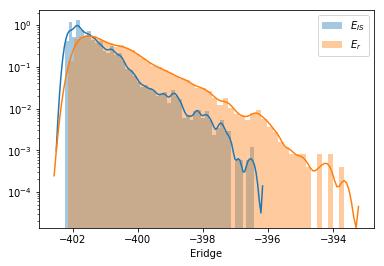

In [5]:
#I plot the distributions, which look vaguely exponential with the current data.
ax=sns.distplot(dataRidges['Eante'], hist_kws={'log':True, "label": "$E_{IS}$"})
ax=sns.distplot(dataRidges['Eridge'], hist_kws={'log':True, "label": "$E_{r}$"})
ax.legend()
print('Ratio between variances is not small: ',dataRidges['Eridge'].var()/dataRidges['Eante'].var())

### Check that inherent structures are symmetric around the barrier

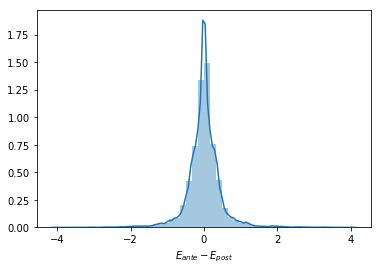

In [6]:
#Now we compare the two ISs around a barrier
sns.distplot(dataRidges['Eante']-dataRidges['Epost'], axlabel='$E_{ante}-E_{post}$')

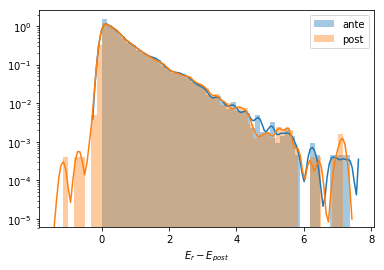

In [7]:
#Compare barrier with respect to following and previous IS
ax=sns.distplot(dataRidges['Eridge']-dataRidges['Eante'], axlabel='$E_{r}-E_{ante}$', hist_kws={'log':True, "label": "ante"})
ax=sns.distplot(dataRidges['Eridge']-dataRidges['Epost'], axlabel='$E_{r}-E_{post}$', hist_kws={'log':True, "label": "post"})
ax.legend()

### Distribution of barrier heights

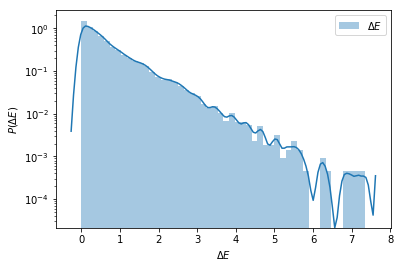

In [8]:
#Distribution of barrier heights
dataRidges['deltaE']=dataRidges['Eridge']-dataRidges['Eante']
ax=sns.distplot(dataRidges['deltaE'], hist_kws={'log':True, "label": "$\Delta E$"})
ax.set_ylabel('$P(\Delta E)$')
ax.set_xlabel('$\Delta E$')
ax.legend()

Compare the three distributions, by substracting their minimum value

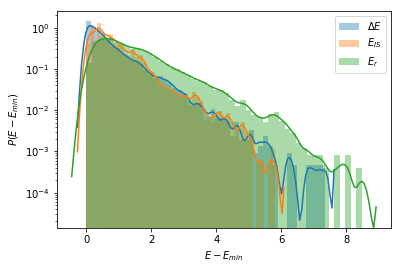

In [9]:
ax=sns.distplot(dataRidges['deltaE']-dataRidges['deltaE'].min(), hist_kws={'log':True, "label": "$\Delta E$"})
ax=sns.distplot(dataRidges['Eante']-dataRidges['Eante'].min(), hist_kws={'log':True, "label": "$E_{IS}$"})
ax=sns.distplot(dataRidges['Eridge']-dataRidges['Eridge'].min(), hist_kws={'log':True, "label": "$E_{r}$"})
ax.set_ylabel('$P(E-E_{min})$')
ax.set_xlabel('$E-E_{min}$')
ax.legend()


### Trapping times

The trapping time distribution has a lot of wholes, which essentially tells us that a much larger sampling is needed in order to say something properly. Tentatively, the largest time we measure accurately is ~300.

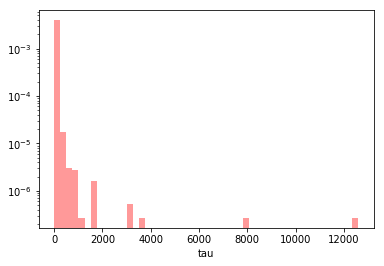

In [10]:
#Full data
dataRidges['tau']=dataRidges['time'].diff()
sns.distplot(dataRidges['tau'][1:],norm_hist=True, kde=False,hist_kws={'log':True, 'color':'red'})

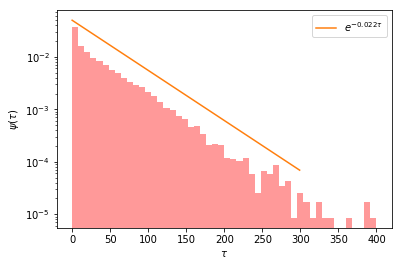

In [11]:
#Only decently sampled times (tau<400)
dataRidges['tau']=dataRidges['time'].diff()
range=(0,400)
ax=sns.distplot(dataRidges['tau'][1:],norm_hist=True, kde=False,hist_kws={'log':True, 'color':'red', 'range':range})
#ax.set(xscale="log", yscale="log") #if we want to show that it is not a power law
x=np.arange(0,300,1)
y=np.exp(-3-0.022*x)
plt.plot(x,y,label='$e^{-0.022\\tau}$')
ax.set_ylabel('$\psi(\\tau)$')
ax.set_xlabel('$ \\tau $')
ax.legend()

### Correlations between subsequent inherent structures

### Correlations between subsequent ridges